<center> <h2> DS 3000 - Summer 2021</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3>Predicting the Metacritic Score of a Movie/Series on Netflix </h3> </center>
<center><h4>Tina Chen, Taoli Zhao, Jesse Elliott</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

We chose to analyze a Netflix dataset to see if there is any correlation between aspects like genre, tags, runtime, directors, etc. with Metacritic scores, which are usually used to predict future sales and revenue. Knowing this correlation may help with investments and funding for a movie/show. We used RFE to determine the top 3 features that had the most correlation with Metacritic scores. We found that these features include Rotten Tomato score, IMDB votes, and Hidden Gem scores. We were surprised to see that factors such as genre or tags didn't have as much of a significant effect. We also used various machine learning algorithms to train and test our data to see which was the most accurate. Support Vector Machines ended up with the highest accuracy on the testing set. Using these indicators, future investors may be able to determine their investments with these features.


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION



<h4>Problem Statement</h4>

Our goal is to determine which features of a Netflix show/movie best predict its metacritic score. We would also like to find which ML regression algorithm predicts our target the best (Multiple Linear Regression, Lasso, Ridge, k-Nearest Neighbor, and Support Vector Machine). The topic of our project is analyzing Netflix shows/movies and their ratings based on certain attributes. The attributes include tags, genre, actors, awards received, etc.. We want to see how well the most pertinent (3) features correlate to the Metacritic score each movie/series receives. We also want to compare three regression ML models to see which predicts the target the best.

<h4>Significance of the Problem</h4>

This is an important problem to tackle because if we have a good prediction algorithm for Metacritic score of movies/shows, this can be applicable to use in the real world. Before movies/shows are released, our algorithm can predict how the feedback from the public will look like, in turn leading to possibly more investments for financial revenue in the movie/show.  	

<h4>Questions</h4>

To explore the data, we want to see which features have the highest correlation with Metacritic score, our target variable. To evaluate the usefulness of our model, we will determine the prediction accuracy of our target variable based on our top three selected features. We will also determine which ML model (Multiple Linear Regression, Lasso, Ridge, k-Nearest Neighbor, and Support Vector Machine) best predicts our target and provides the highest accuracy. With the top three most relevant features, we will be able to determine what's the best indicator of Metacritic scores. In addition, we wonder if scores from a rating platform such as Hidden Gem and Rotten Tomato, which consists of reviews from regular watchers, will differ significantly from professional critics, which use Metacritic.


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition


In [ ]:
import pandas as pd

In [ ]:
# read csv from github
df = pd.read_csv("https://raw.githubusercontent.com/tchen119/DS3000-Netflix-Project/main/Netflix_scraped_dataset.csv")
df

,Unnamed: 0,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Actors,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Summary,IMDb Votes
0,15,Joker,"Crime, Drama, Thriller","Dark Comedies,Crime Comedies,Dramas,Comedies,C...",English,Movie,3.5,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Todd Phillips,"Joaquin Phoenix, Zazie Beetz, Robert De Niro, ...",8.4,68.0,59.0,112.0,"$335,451,311",04 Oct 2019,A practical jokers fake kidnapping at a bachel...,951938.0
1,16,I,"Action, Adventure, Fantasy, Sci-Fi","Dramas,Swedish Movies","English, Sanskrit",Movie,2.8,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,George Lucas,"Liam Neeson, Ewan McGregor, Natalie Portman, J...",6.5,52.0,51.0,26.0,"$474,544,677",19 May 1999,A young man seeking his identity begins a roma...,733336.0
2,17,Harrys Daughters,"Adventure, Drama, Fantasy, Mystery","Dramas,Swedish Movies",English,Movie,4.4,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,David Yates,"Ralph Fiennes, Alan Rickman, Michael Gambon, D...",8.1,96.0,85.0,46.0,"$381,409,310",15 Jul 2011,"As two sisters both experience pregnancy, trag...",766594.0
3,28,The Closet,Comedy,"Korean Movies,Horror Movies,Mysteries",French,Movie,3.8,South Korea,1-2 hour,Francis Veber,"Gérard Depardieu, Michèle Laroque, Daniel Aute...",7.0,85.0,72.0,1.0,"$6,678,894",10 Aug 2001,A recent widowers move into a new house takes ...,16657.0
4,60,Ordinary People,Drama,"Korean Movies,Thriller Movies,Crime Thrillers",English,Movie,4.2,South Korea,1-2 hour,Robert Redford,"Donald Sutherland, Mary Tyler Moore, Judd Hirs...",7.7,89.0,86.0,19.0,"$54,766,923",19 Sep 1980,During a probe into a missing high school stud...,47265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,15456,50 First Dates,"Comedy, Drama, Romance","Romantic Favourites,Romantic Comedies,Comedies...","English, Hawaiian, Mandarin",Movie,2.7,"Hong Kong,South Korea,Japan,United Kingdom,Tha...",1-2 hour,Peter Segal,"Sean Astin, Adam Sandler, Rob Schneider, Drew ...",6.8,45.0,48.0,6.0,"$120,908,074",13 Feb 2004,After falling for a pretty art teacher who has...,327916.0
2107,15457,21,"Crime, Drama, History, Thriller","Dramas,Dramas based on a book,Police Dramas,Po...",English,Movie,2.5,"South Korea,Russia,Hong Kong,Portugal,Belgium,...",> 2 hrs,Robert Luketic,"Kevin Spacey, Aaron Yoo, Kate Bosworth, Jim St...",6.8,36.0,48.0,1.0,"$81,159,365",28 Mar 2008,A brilliant group of students become card-coun...,230337.0
2108,15459,One Chance,"Biography, Comedy, Drama, Music","Dramas,Biographical Dramas,Dramas based on rea...","English, Italian",Movie,3.0,"Japan,Malaysia",1-2 hour,David Frankel,"James Corden, Colm Meaney, Alexandra Roach, Ju...",6.8,63.0,52.0,3.0,"$101,196",25 Oct 2013,"From shop worker to worldwide phenomena, this ...",11536.0
2109,15460,The Twilight Saga: Breaking Dawn: Part 1,"Adventure, Drama, Fantasy, Romance, Thriller","Dramas,Romantic Dramas,Dramas based on a book,...","English, Portuguese",Movie,2.0,"Canada,Romania,Japan,Switzerland,United Kingdo...",> 2 hrs,Bill Condon,"Billy Burke, Taylor Lautner, Sarah Clarke, Gil...",4.9,25.0,45.0,11.0,"$281,287,133",18 Nov 2011,Not long after immortal soul mates Bella Swan ...,224372.0


**Source of Data**

We find the orginal dataset in the webpage https://www.kaggle.com/ashishgup/netflix-rotten-tomatoes-metacritic-imdb. In this dataset, it contains title, genre, tags, languages, type (series or movies), Hidden Gem Score, Country Availability, runtime, director, writer, actors, view rating, IMDb Score, Rotten Tomatoes Score, Metracritic Score, Awards Received, Awards Nominated For, boxoffice, release date, Netflix Release Date, profuction house, Netflix Link, IMDb link, summary, IMDb votes, image, poster, TMDb trailer, and trailer site of a Movie/Series on Netflix. However, after we decided our topic of the project, we have scrapted the data. The following section will describe each features. 

**Description of Features (After Scraped)**

(Please check the scraped dataframe in the following section) 


* "Genre": The genre of the Movie on Netflix  
* "Tags": The tags of the Movie on Netflix
* "Languages": The available languages for the Movies
* "Hidden Gem Score": The Hidden Gem Score of the Movies on Netflix
* "Country Availability": The available countries of the Movies
* "Runtime": The runtime of the Movie
* "IMDb Score": The IMDb Score of the Movies on Netflix
* "Rotten Tomatoes Score": The Rotten Tomatoes Score of the Movies on Netflix
* "Awards Received": The number of the awards that the Moviereceived
* "Boxoffice": The boxoffice of the Movie in USD
* "Released Date": The released Date of the Movie
* "IMDb Votes": The number of IMDb Votes of the Movies on Netflix

**Description of Target**
* "Metacritic Score": The Metacritic Score of Movies on Netflix



### 2.2. Data Analysis


**Predictive Model**

We are going to predict the Metacritic Score of a new Movie/Series on Netflix by using the data from the released Movie/Series on Netflix. In other words, by giving all the features information of released Movue/Series on Netflix and its corresponding Metracitic Score, we could predict the Metractic Score of the a Movie/Series that has not released yet.

**Our project is a supervised Learning Problem**

The project is supervised Learning Problem and its sub-categorized is regression since our data are labeled and target is continuous.

**Machine Learning Algorithms to use**

We are going to use Multiple Linear Regression, Lasso, Ridge, k-Nearest Neighbor, and Support Vector Machine.


<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling

In [ ]:
# drop extra columns and rearrange the dataframe
df = df.drop(columns = ['Title', 'Unnamed: 0', 'Summary', 'Actors',  'Director','Series or Movie'])
df = df[['Genre', 'Tags', 'Languages', 'Hidden Gem Score', 'Country Availability',  'Runtime', 'IMDb Score',	'Rotten Tomatoes Score', 'Awards Received', 
         'Boxoffice', 'Release Date', 'IMDb Votes', 'Metacritic Score']]

In [ ]:
df

,Genre,Tags,Languages,Hidden Gem Score,Country Availability,Runtime,IMDb Score,Rotten Tomatoes Score,Awards Received,Boxoffice,Release Date,IMDb Votes,Metacritic Score
0,"Crime, Drama, Thriller","Dark Comedies,Crime Comedies,Dramas,Comedies,C...",English,3.5,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,8.4,68.0,112.0,"$335,451,311",04 Oct 2019,951938.0,59.0
1,"Action, Adventure, Fantasy, Sci-Fi","Dramas,Swedish Movies","English, Sanskrit",2.8,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,6.5,52.0,26.0,"$474,544,677",19 May 1999,733336.0,51.0
2,"Adventure, Drama, Fantasy, Mystery","Dramas,Swedish Movies",English,4.4,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,8.1,96.0,46.0,"$381,409,310",15 Jul 2011,766594.0,85.0
3,Comedy,"Korean Movies,Horror Movies,Mysteries",French,3.8,South Korea,1-2 hour,7.0,85.0,1.0,"$6,678,894",10 Aug 2001,16657.0,72.0
4,Drama,"Korean Movies,Thriller Movies,Crime Thrillers",English,4.2,South Korea,1-2 hour,7.7,89.0,19.0,"$54,766,923",19 Sep 1980,47265.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,"Comedy, Drama, Romance","Romantic Favourites,Romantic Comedies,Comedies...","English, Hawaiian, Mandarin",2.7,"Hong Kong,South Korea,Japan,United Kingdom,Tha...",1-2 hour,6.8,45.0,6.0,"$120,908,074",13 Feb 2004,327916.0,48.0
2107,"Crime, Drama, History, Thriller","Dramas,Dramas based on a book,Police Dramas,Po...",English,2.5,"South Korea,Russia,Hong Kong,Portugal,Belgium,...",> 2 hrs,6.8,36.0,1.0,"$81,159,365",28 Mar 2008,230337.0,48.0
2108,"Biography, Comedy, Drama, Music","Dramas,Biographical Dramas,Dramas based on rea...","English, Italian",3.0,"Japan,Malaysia",1-2 hour,6.8,63.0,3.0,"$101,196",25 Oct 2013,11536.0,52.0
2109,"Adventure, Drama, Fantasy, Romance, Thriller","Dramas,Romantic Dramas,Dramas based on a book,...","English, Portuguese",2.0,"Canada,Romania,Japan,Switzerland,United Kingdo...",> 2 hrs,4.9,25.0,11.0,"$281,287,133",18 Nov 2011,224372.0,45.0


We dropped the features that we thought would be least relevant to our target variable.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# feature extraction from text using CountVectorizer:

# genre feature extraction
genre_vect = CountVectorizer(tokenizer = lambda x : x.split(','))
genre_vect.fit(df['Genre'].values)
bag_of_words = genre_vect.transform(df['Genre'].values)

print("Genre Vocabulary: \n", genre_vect.vocabulary_)
print("\nGenre Vocabulary size: ", len(genre_vect.vocabulary_))

feature_names = genre_vect.get_feature_names()
genre_df = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
genre_df.columns = "genre_" + genre_df.columns
genre_df

Genre Vocabulary: 
 {'crime': 25, ' drama': 5, ' thriller': 17, 'action': 20, ' adventure': 1, ' fantasy': 7, ' sci-fi': 15, 'adventure': 21, ' mystery': 12, 'comedy': 24, 'drama': 27, ' comedy': 3, ' crime': 4, ' horror': 9, ' western': 19, 'biography': 23, 'documentary': 26, ' action': 0, ' romance': 14, ' music': 10, ' biography': 2, ' family': 6, ' history': 8, 'horror': 30, 'animation': 22, ' war': 18, ' sport': 16, ' musical': 11, 'war': 37, 'thriller': 36, 'mystery': 33, 'sci-fi': 35, 'fantasy': 29, 'romance': 34, 'family': 28, ' news': 13, 'music': 31, 'musical': 32, 'western': 38}

Genre Vocabulary size:  39


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


,genre_ action,genre_ adventure,genre_ biography,genre_ comedy,genre_ crime,genre_ drama,genre_ family,genre_ fantasy,genre_ history,genre_ horror,genre_ music,genre_ musical,genre_ mystery,genre_ news,genre_ romance,genre_ sci-fi,genre_ sport,genre_ thriller,genre_ war,genre_ western,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,genre_fantasy,genre_horror,genre_music,genre_musical,genre_mystery,genre_romance,genre_sci-fi,genre_thriller,genre_war,genre_western
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2107,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2108,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2109,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We decided to use Count Vectorizer for our genre, tags, and language features to split the words in each entry and create unique columns that represent the categories. 1's are used to indicate true and 0's indicate false.

In [ ]:
#Tags feature extraction
tags_vect = CountVectorizer(tokenizer = lambda x : x.split(','))
tags_vect.fit(df['Tags'].values)
bag_of_words = tags_vect.transform(df['Tags'].values)

print("\nTags Vocabulary: \n", tags_vect.vocabulary_)
print("\nTags Vocabulary size: ", len(tags_vect.vocabulary_))

feature_names = tags_vect.get_feature_names()
tags_df = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
tags_df

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"



Tags Vocabulary: 
 {'dark comedies': 151, 'crime comedies': 119, 'dramas': 159, 'comedies': 108, 'crime dramas': 120, 'swedish movies': 471, 'korean movies': 295, 'horror movies': 251, 'mysteries': 345, 'thriller movies': 486, 'crime thrillers': 125, 'children & family movies': 83, 'action & adventure': 6, 'adventures': 13, 'movies based on books': 333, 'family features': 188, 'us movies': 496, 'bollywood movies': 61, 'psychological thrillers': 381, 'crime movies': 123, 'indian movies': 260, 'hindi-language movies': 239, 'telugu-language movies': 482, 'movies based on real life': 335, 'award-winning dramas': 42, 'independent movies': 257, 'classic movies': 97, 'sci-fi & fantasy': 422, 'action sci-fi & fantasy': 10, 'romantic comedies': 390, 'romantic films': 395, 'fantasy': 190, 'slapstick comedies': 437, 'action comedies': 8, 'mainland chinese movies': 310, 'horror films': 250, 'films based on books': 196, 'danish movies': 150, 'family comedies': 184, 'indonesian films': 261, 'wester

,boxing & wrestling,20th century period pieces,20th-century period pieces,absurd comedies,academy award-winning films,action,action & adventure,action anime,action comedies,action movies,action sci-fi & fantasy,action thrillers,adult animation,adventures,african films,african movies,african-american comedies,alien sci-fi,ambientadas en otra época,animal tales,animation,anime,anime action,anime action films,anime based on books,anime comedies,anime dramas,anime fantasies,anime feature films,anime features,anime sci-fi & fantasy,anime sci-fi films,argentinian films,argentinian movies,art house films,art house movies,asian action films,asian action movies,asian movies,australian comedies,...,swedish movies,swiss movies,taiwanese movies,tear-jerking romantic movies,tearjerkers,teen comedies,teen dramas,teen films,teen movies,teen romance,teen screams,telugu-language movies,thai action & adventure,thai films,theatre arts,thriller movies,thrillers,thrillers based on a book,thrillers based on books,time travel sci-fi & fantasy,travel & adventure documentaries,turkish dramas,turkish movies,us action,us horror movies,us movies,us sci-fi adventure,us thrillers,vampire films,vampire horror films,vampire horror movies,visually-striking sci-fi & fantasy,wacky comedies,werewolf horror films,westerns,wwii films,wwii movies,youth drama,zombie horror films,zombie horror movies
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# language feature extraction
language_vect = CountVectorizer(tokenizer = lambda x : x.split(','))
language_vect.fit(df['Languages'].values)
bag_of_words = language_vect.transform(df['Languages'].values)

print("\nLanguages Vocabulary: \n", language_vect.vocabulary_)
print("\nLanguages Vocabulary size: ", len(language_vect.vocabulary_))

feature_names = language_vect.get_feature_names()
language_df = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
language_df

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"



Languages Vocabulary: 
 {'english': 126, ' sanskrit': 84, 'french': 128, ' spanish': 98, ' russian': 83, ' german': 34, ' italian': 47, ' french': 31, 'danish': 123, ' english': 25, ' polish': 75, 'indonesian': 133, 'spanish': 148, ' gallegan': 32, ' latin': 57, ' tibetan': 106, ' mongolian': 66, ' romanian': 81, ' serbian': 87, ' ukrainian': 110, ' hebrew': 38, ' mandarin': 62, ' quechua': 79, ' japanese': 48, ' bosnian': 12, ' chinese': 18, ' dutch': 23, 'mandarin': 137, 'korean': 136, 'russian': 147, ' yiddish': 115, ' swiss german': 101, ' algonquin': 4, ' inuktitut': 45, ' arabic': 7, ' hindi': 39, 'cantonese': 120, ' hokkien': 41, ' irish': 46, ' aboriginal': 1, 'german': 129, 'swedish': 149, ' portuguese': 76, 'italian': 134, ' cantonese': 15, ' north american indian': 68, 'japanese': 135, ' swahili': 99, ' norwegian': 69, 'romany': 146, ' bulgarian': 13, 'romanian': 145, 'zulu': 154, ' afrikaans': 2, ' xhosa': 114, 'hindi': 131, ' swedish': 100, ' vietnamese': 112, ' czech': 2

,ancient (to 1453),aboriginal,afrikaans,albanian,algonquin,american sign language,apache languages,arabic,aramaic,armenian,bengali,berber languages,bosnian,bulgarian,burmese,cantonese,catalan,cheyenne,chinese,croatian,czech,danish,dari,dutch,egyptian (ancient),english,esperanto,estonian,filipino,finnish,flemish,french,gallegan,georgian,german,greek,greenlandic,hawaiian,hebrew,hindi,...,yiddish,yoruba,zulu,american sign language,arabic,cantonese,chinese,czech,danish,dari,dutch,english,filipino,french,german,greek,hindi,hungarian,indonesian,italian,japanese,korean,mandarin,maori,neapolitan,none,norwegian,persian,polish,portuguese,romanian,romany,russian,spanish,swedish,tamil,thai,tswana,yiddish,zulu
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#one hot encoding to split up the runtime feature 
from sklearn.preprocessing import OneHotEncoder

runtime = df['Runtime'].values.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
encoded_df = encoder.fit_transform(runtime)

runtime_df = pd.DataFrame(encoded_df, columns = encoder.get_feature_names())
runtime_df.columns = ['1-2 hour', '< 30 minutes', '> 2 hrs']
runtime_df

,1-2 hour,< 30 minutes,> 2 hrs
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
2106,1.0,0.0,0.0
2107,0.0,0.0,1.0
2108,1.0,0.0,0.0
2109,0.0,0.0,1.0


We chose to use One Hot Encoding because we wanted to split up the runtime into a dataframe that is more easily readable by our algorithms. This creates three features of time frames and a 1.0 indicates which category the index falls under.

In [ ]:
#features still to be processed
unfinished_features = df.drop(["Metacritic Score", "Genre", "Runtime", "Tags", "Country Availability", "Languages", 'Hidden Gem Score'], axis=1)
unfinished_features

,IMDb Score,Rotten Tomatoes Score,Awards Received,Boxoffice,Release Date,IMDb Votes
0,8.4,68.0,112.0,"$335,451,311",04 Oct 2019,951938.0
1,6.5,52.0,26.0,"$474,544,677",19 May 1999,733336.0
2,8.1,96.0,46.0,"$381,409,310",15 Jul 2011,766594.0
3,7.0,85.0,1.0,"$6,678,894",10 Aug 2001,16657.0
4,7.7,89.0,19.0,"$54,766,923",19 Sep 1980,47265.0
...,...,...,...,...,...,...
2106,6.8,45.0,6.0,"$120,908,074",13 Feb 2004,327916.0
2107,6.8,36.0,1.0,"$81,159,365",28 Mar 2008,230337.0
2108,6.8,63.0,3.0,"$101,196",25 Oct 2013,11536.0
2109,4.9,25.0,11.0,"$281,287,133",18 Nov 2011,224372.0


In [ ]:
#converts date to year
def convertDate(date):
  return int(date[7:11])

# turn money amount into int
def convertMoney(money):
    return int(money.replace(",", "").replace("$", ""))

In [ ]:
# merge all the features
features = unfinished_features.join(genre_df).join(runtime_df).join(language_df).join(tags_df)
features['Awards Received'] = df[['Awards Received']].astype(int)
features['Boxoffice'] = df['Boxoffice'].apply(convertMoney)
features['Release Date'] = df['Release Date'].apply(convertDate)
features

,IMDb Score,Rotten Tomatoes Score,Awards Received,Boxoffice,Release Date,IMDb Votes,genre_ action,genre_ adventure,genre_ biography,genre_ comedy,genre_ crime,genre_ drama,genre_ family,genre_ fantasy,genre_ history,genre_ horror,genre_ music,genre_ musical,genre_ mystery,genre_ news,genre_ romance,genre_ sci-fi,genre_ sport,genre_ thriller,genre_ war,genre_ western,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,genre_fantasy,genre_horror,genre_music,genre_musical,genre_mystery,...,swedish movies,swiss movies,taiwanese movies,tear-jerking romantic movies,tearjerkers,teen comedies,teen dramas,teen films,teen movies,teen romance,teen screams,telugu-language movies,thai action & adventure,thai films,theatre arts,thriller movies,thrillers,thrillers based on a book,thrillers based on books,time travel sci-fi & fantasy,travel & adventure documentaries,turkish dramas,turkish movies,us action,us horror movies,us movies,us sci-fi adventure,us thrillers,vampire films,vampire horror films,vampire horror movies,visually-striking sci-fi & fantasy,wacky comedies,werewolf horror films,westerns,wwii films,wwii movies,youth drama,zombie horror films,zombie horror movies
0,8.4,68.0,112,335451311,2019,951938.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6.5,52.0,26,474544677,1999,733336.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8.1,96.0,46,381409310,2011,766594.0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7.0,85.0,1,6678894,2001,16657.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7.7,89.0,19,54766923,1980,47265.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,6.8,45.0,6,120908074,2004,327916.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2107,6.8,36.0,1,81159365,2008,230337.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2108,6.8,63.0,3,101196,2013,11536.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2109,4.9,25.0,11,281287133,2011,224372.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#our target (Metacritic) values
target = df['Metacritic Score']
target

0       59.0
1       51.0
2       85.0
3       72.0
4       86.0
        ... 
2106    48.0
2107    48.0
2108    52.0
2109    45.0
2110    22.0
Name: Metacritic Score, Length: 2111, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#training and splitting data
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

#scaling data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

#using RFE to recursively eliminate features (leaving us with the 3 most pertinent)
select = RFE(DecisionTreeRegressor(random_state=3000), n_features_to_select=3)
select.fit(X_train_scaled, y_train)
    
X_train_selected = select.transform(X_train_scaled)
X_test_selected = select.transform(X_test_scaled)

#printing out our selected features
print("Selected features after RFE:")
re_df = pd.DataFrame(features.columns, columns=["features"])
re_df["support"] = select.get_support()
i = 0
while i < len(re_df):
    if re_df.at[i, "support"]:
        print("\t" + re_df.at[i, "features"])
    i+=1
print()

Selected features after RFE:
	Rotten Tomatoes Score
	Release Date
	IMDb Votes



### 3.2. Data Exploration


Standard Deviation of Target: 17.070746607022947
Mean of Target: 60.61061108479394


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


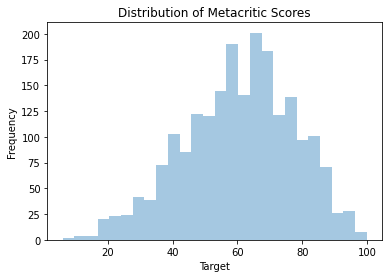

In [ ]:
#histogram of the distribution of target 
import seaborn as sns

graph = sns.distplot(target, kde=False)
graph.set_xlabel('Target')
graph.set_ylabel('Frequency')
graph.set_title('Distribution of Metacritic Scores')
print("Standard Deviation of Target:", target.std())
print("Mean of Target:", target.mean())


Embedded Image:
<img src='https://raw.githubusercontent.com/tchen119/DS3000-Netflix-Project/main/metacritic_dist.png'>

#### This graph is a distribution plot showing the distribution of our target variable, the Metacritic scores. We use this to determine if our data is normalized.

In [ ]:
import plotly.express as px
rotten = px.scatter(features, x="Rotten Tomatoes Score", y=target, template="none", hover_name= "Rotten Tomatoes Score",
                    title='Relationship between Rotten Tomatoes Score and Metacritic Score', trendline="ols", labels = {"y": "Metacritic Score"})
rotten.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Embedded Image:
<img src='https://raw.githubusercontent.com/tchen119/DS3000-Netflix-Project/main/tomatoesvsmetacritic.png'>

#### This graph is a scatter plot of the relationship between Rotten Tomato Score and Metacritic score. We added a linear regression line to show the overall trend of the relationship. As we can see from the graph, they are positively correlated.

In [ ]:
#scatterplot of Release Year vs Metacritic score (hover to see line equation and r2 value)
date = px.scatter(features, x="Release Date", y=target, template="none", hover_name= "Release Date",
                    title='Relationship between Release Year and Metacritic Score', trendline="ols", labels = {"y": "Metacritic Score"})
date.show()

Embedded Image:
<img src='https://raw.githubusercontent.com/tchen119/DS3000-Netflix-Project/main/yearvsmetacritic.png'>

#### This is a scatter plot of the relationship between release year and Metacritic score. The data seems to be scatter on the right, as most of our dataset consists of movies/shows from a more recent time period starting from 1970. There seems to be a slight negative correlation, as older movies were rated higher, however more data from before 1970 would be more helpful to our dataset.

In [ ]:
#scatterplot of IMDb Votes vs Metacritic score (hover to see line equation and r2 value)
votes = px.scatter(features, x="IMDb Votes", y=target, template="none", hover_name= "IMDb Votes",
                    title='Relationship between IMDb Votes and Metacritic Score', trendline="ols", labels = {"y": "Metacritic Score"})

votes.show()

Embedded Image:
<img src='https://raw.githubusercontent.com/tchen119/DS3000-Netflix-Project/main/votesvsmetacritic.png'>

#### This is a scatter plot of the relationship between IMDb votes and Metacritic score. As you can see, the more IMDb votes there are, the higher the Metacritic score. There is a positive correlation.

In [ ]:
graph_data = features[["IMDb Votes", "Rotten Tomatoes Score", "Release Date"]]
fig = px.scatter_matrix(graph_data)
fig.show()


Embedded Image:
<img src='https://raw.githubusercontent.com/tchen119/DS3000-Netflix-Project/main/newplot.png'>

#### These are scatter plots showing all the top three selected features with our target variable to see how they each correlate with each other.

### 3.3. Model Training

**Using Machine Learning Algorithms**

Multiple Linear Regression, Ridge, Lasso, k-Nearest Neighbor, and Support Vector Machine.

with SELECTED features

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

#printing out our r2 scores for each model
print('------------------------------------------------------') 
print('Test Result for Each Algorithms with selected features')
print('------------------------------------------------------')   

model = LinearRegression().fit(X=X_train_selected, y=y_train)
print("Linear Regression:")
print("\tR-squared value for training set:", r2_score(y_train, model.predict(X_train_selected)))
print("\tR-squared value for testing set:",  r2_score(y_test, model.predict(X_test_selected)))
print()
model1 = Ridge().fit(X=X_train_selected, y=y_train)
print("Ridge:")
print("\tR-squared value for training set:", r2_score(y_train, model1.predict(X_train_selected)))
print("\tR-squared value for testing set:",  r2_score(y_test, model1.predict(X_test_selected)))
print()
model2 = Lasso().fit(X=X_train_selected, y=y_train)
print("Lasso:")
print("\tR-squared value for training set:", r2_score(y_train, model2.predict(X_train_selected)))
print("\tR-squared value for testing set:",  r2_score(y_test, model2.predict(X_test_selected)))
print()
model3 = KNeighborsRegressor().fit(X=X_train_selected, y=y_train)
print("k-Nearest Neighbor:")
print("\tR-squared value for training set:", r2_score(y_train, model3.predict(X_train_selected)))
print("\tR-squared value for testing set:",  r2_score(y_test, model3.predict(X_test_selected)))
print()
model4 = LinearSVR(max_iter=1000000).fit(X=X_train_selected, y=y_train)
print("Support Vector Machine:")
print("\tR-squared value for training set:", r2_score(y_train, model4.predict(X_train_selected)))
print("\tR-squared value for testing set:",  r2_score(y_test, model4.predict(X_test_selected)))


------------------------------------------------------
Test Result for Each Algorithms with selected features
------------------------------------------------------
Linear Regression:
	R-squared value for training set: 0.8271027074442339
	R-squared value for testing set: 0.8508575454894042

Ridge:
	R-squared value for training set: 0.8270225900094903
	R-squared value for testing set: 0.8509985678518813

Lasso:
	R-squared value for training set: 0.7681362161480337
	R-squared value for testing set: 0.7935898278146125

k-Nearest Neighbor:
	R-squared value for training set: 0.8851358391379749
	R-squared value for testing set: 0.833403528565819

Support Vector Machine:
	R-squared value for training set: 0.8189313206405162
	R-squared value for testing set: 0.8415762263465497


There is no prominent underfitting/overfitting performance. However, there might be a slight underfitting for Lasso. 

**with SCALED features**

In [ ]:
from sklearn.metrics import r2_score

#printing out our r2 scores for each model
print('------------------------------------------------------') 
print('Test Result for Each Algorithms with scaled features')
print('------------------------------------------------------')   

model = LinearRegression().fit(X=X_train_scaled, y=y_train)
print("Linear Regression:")
print("\tR-squared value for training set:", r2_score(y_train, model.predict(X_train_scaled)))
print("\tR-squared value for testing set:",  r2_score(y_test, model.predict(X_test_scaled)))
print()
model1 = Ridge().fit(X=X_train_scaled, y=y_train)
print("Ridge:")
print("\tR-squared value for training set:", r2_score(y_train, model1.predict(X_train_scaled)))
print("\tR-squared value for testing set:",  r2_score(y_test, model1.predict(X_test_scaled)))
print()
model2 = Lasso().fit(X=X_train_scaled, y=y_train)
print("Lasso:")
print("\tR-squared value for training set:", r2_score(y_train, model2.predict(X_train_scaled)))
print("\tR-squared value for testing set:",  r2_score(y_test, model2.predict(X_test_scaled)))
print()
model3 = KNeighborsRegressor().fit(X=X_train_scaled, y=y_train)
print("k-Nearest Neighbor:")
print("\tR-squared value for training set:", r2_score(y_train, model3.predict(X_train_scaled)))
print("\tR-squared value for testing set:",  r2_score(y_test, model3.predict(X_test_scaled)))
print()
model4 = LinearSVR(max_iter=1000000).fit(X=X_train_scaled, y=y_train)
print("Support Vector Machine:")
print("\tR-squared value for training set:", r2_score(y_train, model4.predict(X_train_scaled)))
print("\tR-squared value for testing set:",  r2_score(y_test, model4.predict(X_test_scaled)))

------------------------------------------------------
Test Result for Each Algorithms with scaled features
------------------------------------------------------
Linear Regression:
	R-squared value for training set: 0.9138466454851502
	R-squared value for testing set: -6.746231023146969e+18

Ridge:
	R-squared value for training set: 0.9042676629490186
	R-squared value for testing set: 0.8347793664672741

Lasso:
	R-squared value for training set: 0.7681362161480337
	R-squared value for testing set: 0.7935898278146125

k-Nearest Neighbor:
	R-squared value for training set: 0.5063078734313204
	R-squared value for testing set: 0.37647117502868044

Support Vector Machine:
	R-squared value for training set: 0.8724017529490704
	R-squared value for testing set: 0.8520336749532507


For linear regression, the performance was overfitting because there is a big difference between the training and testing set. The k-Nearest Neighbor shows to be underfitting because both values are underperforming. Support Vector Machine performance was just right. 

### 3.4. Model Optimization
We need to optimize our algorithms because we want to avoid underfitting and overfitting the data. If we have low performance we can tune our data to perform better, however, we want to avoid tuning too much as it may become overfitting. In this case the training set will perform very high at the cost of the performance of the testing set. We want to make sure we use the best parameters as well to get to most accurate performances.

In [ ]:
param_grid1 = {'alpha':[.001, .01, .1, 1, 10, 100]}
param_grid2 = {'metric': ["euclidean", "manhattan", "minkowski"], 'n_neighbors': [1, 5, 10]}
param_grid3 = {"C": [.001, .01, .1, 1, 10, 100]}

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
#estimator dictionary for ease of use :)
estimators1 = { 
    'Ridge': Ridge(),
    'Lasso': Lasso()}

estimators2 = {
    'k-Nearest Neighbor': KNeighborsRegressor()}

estimators3 = {'Support Vector Machine': LinearSVR(max_iter=1000000)}

In [ ]:
from sklearn.model_selection import GridSearchCV

print("Model Optimization for scaled features")
print("--------------------------------------")
for name, method in estimators1.items():
  grid_search1 = GridSearchCV(method, param_grid1, cv=5)
  grid_search1.fit(X=X_train_scaled, y=y_train)
  print(name + ":")
  print("\n\tBest parameters: ", grid_search1.best_params_)
  print("\n\tBest cross-validation score: ", grid_search1.best_score_)
  

for name, method in estimators2.items():
  grid_search2 = GridSearchCV(method, param_grid2, cv=5)
  grid_search2.fit(X=X_train_scaled, y=y_train)
  print("\n" + name + ":")
  print("\n\tBest parameters: ", grid_search2.best_params_)
  print("\n\tBest cross-validation score: ", grid_search2.best_score_)

for name, method in estimators3.items():
  grid_search3 = GridSearchCV(method, param_grid3, cv=5)
  grid_search3.fit(X=X_train_scaled, y=y_train)
  print("\n" + name + ":")
  print("\n\tBest parameters: ", grid_search3.best_params_)
  print("\n\tBest cross-validation score: ", grid_search3.best_score_)


Model Optimization for scaled features
--------------------------------------
Ridge:

	Best parameters:  {'alpha': 10}

	Best cross-validation score:  0.8243705681919028
Lasso:

	Best parameters:  {'alpha': 0.1}

	Best cross-validation score:  0.8432110308809839

k-Nearest Neighbor:

	Best parameters:  {'metric': 'manhattan', 'n_neighbors': 10}

	Best cross-validation score:  0.28632521967002755

Support Vector Machine:

	Best parameters:  {'C': 1}

	Best cross-validation score:  0.8228147882596337


In [ ]:
from sklearn.model_selection import GridSearchCV

print("Model Optimization for selected features")
print("--------------------------------------")
for name, method in estimators1.items():
  grid_search1_1 = GridSearchCV(method, param_grid1, cv=5)
  grid_search1_1.fit(X=X_train_selected, y=y_train)
  print(name + ":")
  print("\n\tBest parameters: ", grid_search1_1.best_params_)
  print("\n\tBest cross-validation score: ", grid_search1_1.best_score_)

for name, method in estimators2.items():
  grid_search2_2 = GridSearchCV(method, param_grid2, cv=5)
  grid_search2_2.fit(X=X_train_selected, y=y_train)
  print("\n" + name + ":")
  print("\n\tBest parameters: ", grid_search2_2.best_params_)
  print("\n\tBest cross-validation score: ", grid_search2_2.best_score_)

for name, method in estimators3.items():
  grid_search3_2 = GridSearchCV(method, param_grid3, cv=5)
  grid_search3_2.fit(X=X_train_selected, y=y_train)
  print("\n" + name + ":")
  print("\n\tBest parameters: ", grid_search3_2.best_params_)
  print("\n\tBest cross-validation score: ", grid_search3_2.best_score_)

Model Optimization for selected features
--------------------------------------
Ridge:

	Best parameters:  {'alpha': 0.1}

	Best cross-validation score:  0.82491857241404
Lasso:

	Best parameters:  {'alpha': 0.01}

	Best cross-validation score:  0.8250471375478913

k-Nearest Neighbor:

	Best parameters:  {'metric': 'euclidean', 'n_neighbors': 10}

	Best cross-validation score:  0.829449106375191

Support Vector Machine:

	Best parameters:  {'C': 100}

	Best cross-validation score:  0.8235035746604513


### 3.5. Model Testing
* Test your tuned algorithms using your **testing set**

In [ ]:
print("Test score after tuning with scaled features")
print("---------------------------------------------")
model1 = Ridge(alpha=10).fit(X=X_train_scaled, y=y_train)
print("Ridge: (with alpha=10)")
print("\tR-squared value for training set:", r2_score(y_train, model1.predict(X_train_scaled)))
print("\tR-squared value for testing set:",  r2_score(y_test, model1.predict(X_test_scaled)))
print()
model2 = Lasso(alpha=0.1).fit(X=X_train_scaled, y=y_train)
print("Lasso: (with alpha-0.1)")
print("\tR-squared value for training set:", r2_score(y_train, model2.predict(X_train_scaled)))
print("\tR-squared value for testing set:",  r2_score(y_test, model2.predict(X_test_scaled)))
print()
model3 = KNeighborsRegressor(metric='manhattan', n_neighbors=10).fit(X=X_train_scaled, y=y_train)
print("k-Nearest Neighbor: (with metric='manhattan', n_neighbors=10)")
print("\tR-squared value for training set:", r2_score(y_train, model3.predict(X_train_scaled)))
print("\tR-squared value for testing set:",  r2_score(y_test, model3.predict(X_test_scaled)))
print()
model4 = LinearSVR(max_iter=1000000, C=1).fit(X=X_train_scaled, y=y_train)
print("Support Vector Machine: (with C=1)")
print("\tR-squared value for training set:", r2_score(y_train, model4.predict(X_train_scaled)))
print("\tR-squared value for testing set:",  r2_score(y_test, model4.predict(X_test_scaled)))

Test score after tuning with scaled features
---------------------------------------------
Ridge: (with alpha=10)
	R-squared value for training set: 0.8752677296716087
	R-squared value for testing set: 0.8549385498342378

Lasso: (with alpha-0.1)
	R-squared value for training set: 0.847594737184527
	R-squared value for testing set: 0.8681382503291072

k-Nearest Neighbor: (with metric='manhattan', n_neighbors=10)
	R-squared value for training set: 0.45223556047472424
	R-squared value for testing set: 0.4246450561149345

Support Vector Machine: (with C=1)
	R-squared value for training set: 0.8724332551404391
	R-squared value for testing set: 0.8519539487090856


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

In [ ]:
print("Test score after tuning with selected features")
print("---------------------------------------------")
model1 = Ridge(alpha=0.1).fit(X=X_train_selected, y=y_train)
print("Ridge: (with alpha=0.1)")
print("\tR-squared value for training set:", r2_score(y_train, model1.predict(X_train_selected)))
print("\tR-squared value for testing set:",  r2_score(y_test, model1.predict(X_test_selected)))
print()
model2 = Lasso(alpha=0.01).fit(X=X_train_selected, y=y_train)
print("Lasso: (with alpha=0.01)")
print("\tR-squared value for training set:", r2_score(y_train, model2.predict(X_train_selected)))
print("\tR-squared value for testing set:",  r2_score(y_test, model2.predict(X_test_selected)))
print()
model3 = KNeighborsRegressor(metric='euclidean', n_neighbors=10).fit(X=X_train_selected, y=y_train)
print("k-Nearest Neighbor: (with metric='euclidean', n_neighbors=10)")
print("\tR-squared value for training set:", r2_score(y_train, model3.predict(X_train_selected)))
print("\tR-squared value for testing set:",  r2_score(y_test, model3.predict(X_test_selected)))
print()
model4 = LinearSVR(max_iter=1000000, C=10).fit(X=X_train_selected, y=y_train)
print("Support Vector Machine: (with C=10)")
print("\tR-squared value for training set:", r2_score(y_train, model4.predict(X_train_selected)))
print("\tR-squared value for testing set:",  r2_score(y_test, model4.predict(X_test_selected)))

Test score after tuning with selected features
---------------------------------------------
Ridge: (with alpha=0.1)
	R-squared value for training set: 0.8271018885754975
	R-squared value for testing set: 0.8508798248094203

Lasso: (with alpha=0.01)
	R-squared value for training set: 0.8270692042055411
	R-squared value for testing set: 0.8509835649404736

k-Nearest Neighbor: (with metric='euclidean', n_neighbors=10)
	R-squared value for training set: 0.8653419612198351
	R-squared value for testing set: 0.8506032672350867

Support Vector Machine: (with C=10)
	R-squared value for training set: 0.8260616332759902
	R-squared value for testing set: 0.8512376011698741


## 4. DISCUSSION

The machine learning algorithms that we used were Multiple Linear Regression, Lasso, Ridge, k-Nearest Neighbor, and Support Vector Machine regression models. Before optimization, the algorithm that revealed the best performance on selected features was Ridge, as it had the most accuracy on the testing set of 0.851. For the scaled features, Support Vector Machine had the most accuracy on the testing set, of 0.851. After optimization and tuning, for the scaled features, Lasso had the highest performance on the testing set, of 0.868 with parameter alpha-0.1. For selected features, Support Vector Machine had the highest performance with C=10 and a performance of 0.851.

For our predictive model, we would use Lasso because we have multiple features, but we want to keep the top three most important features to test. We may also use Ridge because we can reduce the amount of work in the future since it keeps all the features of the dataset. If we want to use the best model for the present work, we should choose k-Nearest Neighbors because it has the best overall performance between both the testing and training set right now. However, Support Vector Machine had the best testing performance. Overall, the reason for choosing these three models is because all of them can reduce future work and allows us to improve the accuracy predictions.

For the selected features, IMBd votes, Rotten Tomato score, and release year, we had a relatively high performance on the training sets and can be used to predict our target variable, Metacritic score. However, for our other features that were included in the original dataset, there wasn't as much of a correlation, as can be seen from the linear regression model used at the beginning, as the testing set had a performance in the negatives. Overall, our top three selected features may be used to predict Metacritic score.

For future work, we can incorporate more data, especially from before 1970, as the scatter plot showing the relationship between release year and Metacritic score showed the lack of data from older time periods. In addition, we can also incorporate country populations to be able to more accurately use the country availability feature. We thought using country availability might propose some bias in our dataset because some countries might have smaller populations resulting in less votes or ratings. Most of our dataset contained movies, but we could also incorporate shows as well to create a more diverse dataset. Finally, we can also incorporate different features as well, ones that have a better correlation with Metacritic score. 

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS

Tina: Worked on cleaning the data, data wrangling, feature extraction, one hot encoding, discussion.

Jesse: Worked on data exploration, introduction, methods. 

Taoli: Worked on model testing, optimization, tuning.

Everyone: Research, summary